
# Laboratoire 1 : Extraction de primitives
#### Département du génie logiciel et des technologies de l’information

|Étudiants||Philippe Ngo - NGOP180393056 Jonathan TABET - TABJ19049603 Nicolas Delcombel - DELN25129704 |  
|--------------|-----------------------|
| Cours | GTI770 - Systèmes intelligents et apprentissage machine |
| Session | AUTOMNE |
| Groupe | 02 |
| Numéro du laboratoire | 1 |
| Professeur | Prof. Jose Dolz |
| Chargé de laboratoire | NOM |
| Date|2019/09/30|

## Plan
* Première partie : Introduction, revue de littérature et choix des primitives.
* Deuxième partie : Importation et traitements des images, extractions des primitives. Commentaires sur les primitives.
* Troisième partie : Création d'un arbre de décision, discussions sur ses performances
* Quatrième partie : Conclusion

## Question 1 : Introduction et revue de Littérature
Le projet _GalaxyZoo_ a pour but de classifier les galaxies présentes dans la base de données du même nom. Le projet est disponible en ligne et n'importe qui peut aider à classifier des galaxies. Cette base de données avec les galaxies identifiées permet d'entrainer des modèles d'apprentissage machine, afin que ceux-ci puissent accélérer l'identification des celles-ci.  Le TP traite des images de galaxies séparées en deux classes : classe « à smooth » et « spiral ». Il s’agit d’un apprentissage supervisé puisque nous avons à notre disposition les entrées (les images) et les sorties (leurs classes).  

Les recherches utilisent aussi bien de l'apprentissage supervisé que non supervisé et on fait des essais avec du deep learning. Une difficulté est de traiter un grand nombre d'images ce qui peut prendre beaucoup de temps afin d'en extraire les primitives. Pour cela, plusieurs méthodes de vision par ordinateur sont utilisées, telles que  :  
l'index de concentration de couleur [1], la valeur qui donne la composition des couleurs de l'image,  ainsi que la couleur du centre des galaxies.  
D’autres méthodes utilisent une PCA (Principle component Analysis) qui permet de réduire l'image à un vecteur [3] afin de l'utiliser comme primitive.   
La texture de l'image apporte aussi des informations et peut-être décrites avec son entropie [4], et peut-être extraite avec un modele binaire local [1] ou une transformée de Fourier discrète [4].   
Enfin, la forme globale de l'image peut être extraite avec son moment [2] [1], ou avec des histogrammes de gradient orienté ou un histogramme de bord polaire [2].  

Nous avons remarqué que souvent, les scientifiques mélangeaient des primitives qui apportent des informations sur la couleur, la forme, et la texture de l'image.


## Question 2 : Primitives choisies
La première différence d’un point de vue humain est la dimension des spirals qui sont en forme d’ellipse ovale comparé aux smooth qui sont rondes. Nous avons donc chercher une primitive dans ce sens. La bibliotech opencv offre des fonctions qui permettent de filtrer l’image et d’associé à l’objet detecté une forme d’ellipse. Le calcul de hauteur sur la largeur constitue une premiere primitive.  

La couleur du centre des galaxies donnent des informations importantes sur le type de galaxie [5], selon Fang-Chieh Chou [2] la couleur du pixel central est représentative de la couleur du centre de la galaxie. Nous l'avons donc utilisé comme deuxième primimtive.  

Enfin, selon Mohamed Abd El Aziz1 & Al. [4], l'enthropie est des facteur de la texture qui apport le plus d'information sur le type de galaxie. Nous avons donc utilisé l'enthropie comme dernière primitive 


[1] F. Ferrari, R. R. de Carvalho, and M. Trevisan : MORFOMETRYKA—A NEW WAY OF ESTABLISHING MORPHOLOGICAL CLASSIFICATION OF GALAXIES. The Astrophysical Journal, 814:55 (17 November 2015).  

[2] Fang-Chieh Chou Galaxy Zoo Challenge: Classify Galaxy Morphologies from Images (March 19, 2014)  

[3] Alexandre Gauthier, Archa Jain,y and Emil Noordehz : Galaxy Morphology Classification. (December 16, 2016)

[4] Mohamed Abd El Aziz, I. M. Selim & Shengwu Xiong : Automatic Detection of Galaxy
Type From Datasets of Galaxies
Image Based on Image Retrieval
Approach (30 June 2017).

[5] Banerji, M., Lahav, O., Lintott, C. J.,
Abdalla, F. B., Schawinski, K., Bamford,
S. P., Andreescu, D., Murray, P., Raddick,
M. J., Slosar, A., Szalay, A., Thomas, D.,
and Vandenberg, J. Galaxy zoo: reproduc-
ing galaxy morphologies via machine learning.
Monthly Notices of the Royal Astronomical So-
ciety 406, 1 (July 2010), 342•353.  



In [2]:
import cv2
import pylab
import csv
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import pandas as pd
from skimage import io
from skimage.color import rgb2hsv

In [3]:
def readImages(dir,file):
    """
    Read images in the directory and id and labels of these images in file, 
    return a list of images and an array of class and id of these images. 
    Args:
        dir (str): The directory where the images are stocked.
        file (str): The file where the id and class are stocked.

    Returns:
        images[] (list) : a list of images
        Y['id','class'] (np.array) : an array of the corresponding id and class  
    """

    smooth_array = []
    spiral_array = []
    with open(file, 'r') as csvfile:
        csv_reader = csv.DictReader(csvfile)
        next(csv_reader) # skip header
        data = [r for r in csv_reader] # for all rows, add in data
        spiral_count = 0
        smooth_count = 0
        c = 0
        for row in data:
            path = dir + row['id'] + ".jpg"
            if(os.path.exists(path) and (spiral_count + smooth_count) < 100):
                if row['class'] == 'spiral' and spiral_count < 50: #if the row's class is spiral, append to the spiral's list
                    spiral_array.append(row)
                    spiral_count += 1
                elif row['class'] == 'smooth' and smooth_count < 50:
                    smooth_array.append(row)   #else append to the smooth's list
                    smooth_count += 1
    # Generate X and Y matrices
    Y = smooth_array + spiral_array
    Y = np.array(Y)
    images = []
    for row in Y:
        images.append(io.imread(dir + row["id"] + '.jpg'))

    X = np.array(images)
    print("Images lues")
    return images, Y

In [4]:
def imgToGray(image):
    """
    Turn an image into shades of gray

    Args: 
        image : an OpenCV standard image format.
        

    Returns:
        img_gray_float : an OpenCV gray image.
         
    """
    img_gray = cv2.cvtColor(image.astype("uint8"), cv2.COLOR_BGR2GRAY)
    img_gray_float = img_gray.astype(np.float32)
    return img_gray_float

In [5]:
def rescale(image, min=0, max=255):
        """ Rescale the colors of an image.
        Utility method to rescale colors from an image. 
        Args: 
            image: an OpenCV standard image format.
            min: The minimum color value [0, 255] range.
            max: The maximum color value [0, 255] range.
        
        Returns:
            The image with rescaled colors.
        """
        image = image.astype('float')
        image -= image.min()
        image /= image.max()
        image = image * (max - min) + min

        return image

In [6]:
def saturate(image, q0=0.01, q1=0.75):
        """ Stretch contrasts of an image. 
        
        Utility method to saturate the contrast of an image. 

        Args:
            image: an OpenCV standard image format.
            q0: minimum coefficient.
            q1: maximum coefficient.

        Returns:
            The image with saturated contrasts. 
        """
        assert image is not None
        
        if q0 is None:
            q0 = 0
        if q1 is None:
            q1 = 1
        q = np.quantile(image[np.nonzero(image)].flatten(), [q0, q1])
        image[image < q[0]] = q[0]
        image[image > q[1]] = q[1]
        
        return image

In [7]:
def remove_starlight(image_color, image_gray):
        """ Removes the star light in images.

        Calclates the median in color and gray scale image to clean the image's background.

        Args:
             image_color: an OpenCV standard color image format.
             image_gray: an OpenCV standard gray scale image format.

        Returns:
            An image cleaned from star light.
        """
        t = np.max(np.median(image_color[np.nonzero(image_gray)]))
        image_color[image_color < t] = t

        return rescale(image_color).astype("uint8")


In [8]:
def imageBlur(image):
    """ Blur the image.

        Uses Gaussian and Median blur.

        Args:
             image : an OpenCV standard image format.

        Returns:
            img_blurred : an image blurred.
        """
    img_blurred = cv2.GaussianBlur(image, (3,3), 0)
    img_blurred = cv2.medianBlur(img_blurred, 5)
    return img_blurred

In [9]:
def imageCrop(image,l):
    """ Crop the image of l pixels.

        Args:
             image : an OpenCV standard image format.
             l : an integer.

        Returns:
            An image croped.
    """
    center_x = image.shape[1]//2       #Find center x position of the image
    center_y = image.shape[0]//2       #Find center y position of the image
    return image[center_y - l:center_y + l, center_x - l:center_x + l,:]

In [10]:
def PipelineColor(image):
    """
    From an image in format 100*100, return the hue of the center pixel

        Args:
             image : an OpenCV standard image format.

        Returns:
            nombre (float) : the value of the hue of the center pixel
        """
    img_color_float = image.astype(np.float32)
    img_blurred = imageBlur(img_color_float)
    img_gray_float = imgToGray(image)
    img_color = remove_starlight(image_color=img_blurred, image_gray=img_gray_float)
    img_finale = imageCrop(img_color,100)
    nombre = rgb2hsv(np.array([[img_finale[50][50]]]))[0][0][0]
    return nombre

In [11]:
def PipelineShape(image):
    """ Return shape of an image.
        
        From an Image, find the dominant shape on it. Return the ratio width/length.
        If there is no shape found return 0.
        If length = 0 return 1.

        Args:
             image : an OpenCV standard image format..

        Returns:
            nombre (float): he ratio width/length of the biggest shape on the image
    """
    img_color_float = image.astype(np.float32)
    img_blurred = imageBlur(img_color_float)
    img_gray_float = imgToGray(image)
    img_color = remove_starlight(image_color=img_blurred, image_gray=img_gray_float)
    saturated = saturate(image=img_color, q0=0.1, q1=0.85)
    image_crop = imageCrop(saturated,50)
    
    img_gray = cv2.cvtColor(image_crop,cv2.COLOR_BGR2GRAY) #filtrage de l'image pour ameliorer l'ellipse crée
    ret, thresh = cv2.threshold(img_gray, 11, 255,0)
    contours,hierarchy = cv2.findContours(thresh,2,1)
    if len(contours)>0:
        cnt = contours[0]
        if len(cnt)>5:
            ellipse = cv2.fitEllipse(cnt) #creation d'une ellipse autour de l'objet detecté
            img_ellipse = cv2.ellipse(img_gray,ellipse,(0,255,0),2)

            leftmost = tuple(cnt[cnt[:,:,0].argmin()][0]) #point de l'ellipse le plus à gauche
            rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])#point de l'ellipse le plus à droite
            topmost = tuple(cnt[cnt[:,:,1].argmin()][0])# point de l'ellipse le plus en haut
            bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])# point de l'ellipse le plus en bas

            a=(((rightmost[0]-leftmost[0])**2)+((rightmost[1]-leftmost[1])**2))**(1/2) #calcul de la largeur de l'ellipse
            b=(((topmost[0]-bottommost[0])**2)+((topmost[1]-bottommost[1])**2))**(1/2) #calcul de la longueur de l'ellipse
            if b == 0 :
                c = 1
            else :
                c = a/b #creation largeur sur longueur
        else :
            c = 0
    else : 
        c = 0
    return c

In [12]:
def PipelineEntropy(image): 
    """ Extract entropy from an image

        Args:
             image : an OpenCV standard image format.

        Returns:
            the entropy of the image
    """
    # https://docs.opencv.org/2.4/modules/imgproc/doc/histograms.html?highlight=calchist#calchist
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    # Shannon entropy formula
    hist = hist.ravel() / hist.sum()
    logs = np.nan_to_num(np.log2(hist))
    return -1 * (hist * logs).sum()

In [40]:
X, Y = readImages('images_training\\','galaxy.csv')


Images lues


In [41]:
X_color = [PipelineColor(image) for image in X]

In [42]:
X_shape = [PipelineShape(image) for image in X]

In [43]:
X_entropy = [PipelineEntropy(image) for image in X]

C:\Users\nicolas\Anaconda3\envs\opencv-env\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log2
  


Text(0.5, 0.98, 'Valeurs du pixel central')

<Figure size 432x288 with 0 Axes>

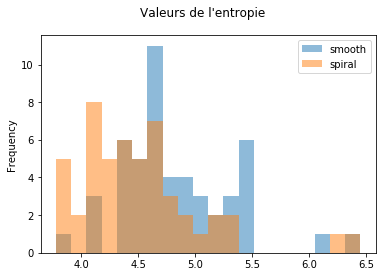

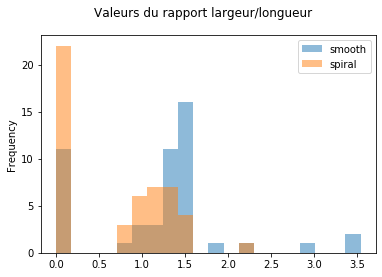

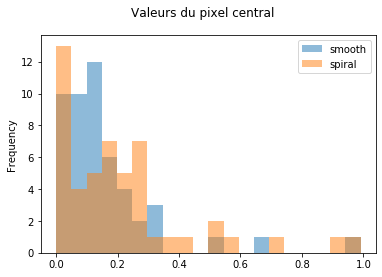

In [44]:
df_enthropy = pd.DataFrame(list(zip(X_entropy[:50], X_entropy[50:])), 
               columns =['smooth', 'spiral']) 
df_shape = pd.DataFrame(list(zip(X_shape[:50], X_shape[50:])), 
               columns =['smooth', 'spiral']) 
df_color = pd.DataFrame(list(zip(X_color[:50], X_color[50:])), 
               columns =['smooth', 'spiral']) 

plt.figure();
df_enthropy.plot.hist(alpha=0.5,bins=20)
pylab.suptitle("Valeurs de l'entropie")
df_shape.plot.hist(alpha=0.5,bins=20)
pylab.suptitle("Valeurs du rapport largeur/longueur")
df_color.plot.hist(alpha=0.5,bins=20)
pylab.suptitle("Valeurs du pixel central")

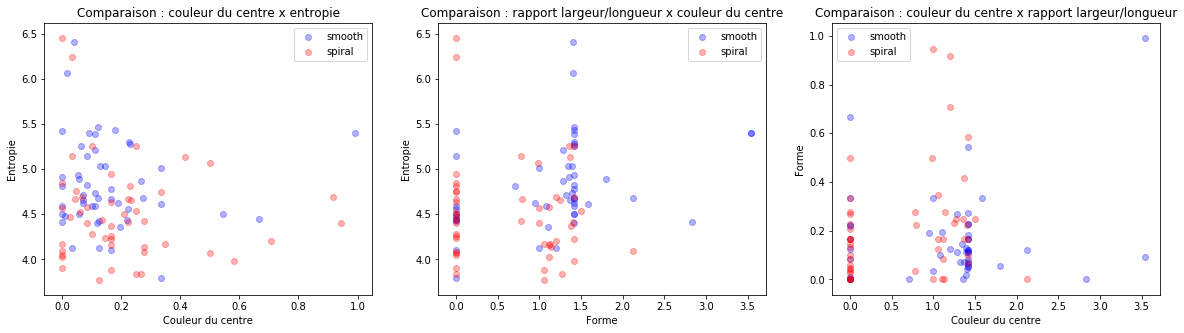

In [45]:
fig, ax = plt.subplots(1,3,figsize=(20, 5))
ax[0].scatter(X_color[:50], X_entropy[:50], c = 'b',label='smooth', alpha = 0.3)
ax[0].scatter(X_color[50:], X_entropy[50:], c = 'r',label='spiral', alpha = 0.3)
ax[0].set_title("Comparaison : couleur du centre x entropie")
ax[0].set(xlabel = 'Couleur du centre', ylabel='Entropie')

ax[1].scatter(X_shape[:50], X_entropy[:50], c = 'b',label='smooth', alpha = 0.3)
ax[1].scatter(X_shape[50:], X_entropy[50:], c = 'r',label='spiral', alpha = 0.3)
ax[1].set_title("Comparaison : rapport largeur/longueur x couleur du centre")
ax[1].set(xlabel = 'Forme', ylabel='Entropie')

ax[2].scatter(X_shape[:50],X_color[:50], c = 'b',label='smooth', alpha = 0.3)
ax[2].scatter(X_shape[50:],X_color[50:], c = 'r',label='spiral', alpha = 0.3)
ax[2].set_title("Comparaison : couleur du centre x rapport largeur/longueur")
ax[2].set(xlabel = 'Couleur du centre', ylabel='Forme')

ax[0].legend()
ax[1].legend()
ax[2].legend()

plt.show()

## Question 3 : efficacité des primitives 
Pour les primitives du rapport largeur/longueur et de l'entropie, leurs histogrammes indiquent que les catégories peuvent être séparées vers la valeur 1.2 pour la forme, et 4.7 pour l'entropie.  

Lorsque l'on compare les différentes primités, l'on remarque que les galaxies spirales ont tendance à avoir un rapport largeur/longueur de zéro et une entropie basse, ce qui indique que ces primitives sont assez efficaces pour distinguer les deux catégories

In [46]:
X_features = [0]*len(X)
for k in range(len(X)):
    X_features[k] = [X_entropy[k],X_color[k],X_shape[k]]
Y_verif = ['smooth']*50+['spiral']*50 

X_features_training =  X_features[0:35]+X_features[50:85]
Y_training = ['smooth']*35+['spiral']*35

X_features_test =  X_features[35:50]+X_features[85:]
Y_test = ['smooth']*15+['spiral']*15


In [47]:
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
DEPTHS = [None, 2, 3, 4, 5, 10]
Scores = []
for depth in DEPTHS:
    clf = tree.DecisionTreeClassifier(max_depth = depth)
    clf = clf.fit(X_features_training, Y_training)
    score = clf.score(X_features_test, Y_test)
    Scores.append(score)
    
    print(" - Score et cross validation score : " + str(depth) + " depth - ")
    print(score)
    print(cross_val_score(clf, X_features, Y_verif, cv=5))

 - Score et cross validation score : None depth - 
0.5333333333333333
[0.6  0.55 0.65 0.5  0.6 ]
 - Score et cross validation score : 2 depth - 
0.7
[0.75 0.75 0.75 0.45 0.75]
 - Score et cross validation score : 3 depth - 
0.7
[0.7  0.7  0.75 0.5  0.7 ]
 - Score et cross validation score : 4 depth - 
0.6666666666666666
[0.7  0.65 0.75 0.65 0.7 ]
 - Score et cross validation score : 5 depth - 
0.5666666666666667
[0.6  0.6  0.55 0.55 0.65]
 - Score et cross validation score : 10 depth - 
0.5333333333333333
[0.6  0.6  0.55 0.5  0.45]


Text(0, 0.5, 'Précision')

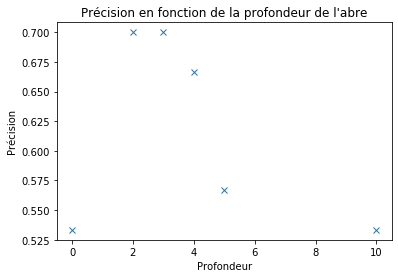

In [48]:
plt.plot([0, 2, 3, 4, 5, 10],Scores,'x')
plt.title("Précision en fonction de la profondeur de l'abre")
plt.xlabel("Profondeur")
plt.ylabel("Précision")

[Text(148.8, 190.26, 'X[2] <= 1.281\ngini = 0.5\nsamples = 70\nvalue = [35, 35]'),
 Text(74.4, 135.9, 'X[0] <= 3.814\ngini = 0.411\nsamples = 38\nvalue = [11, 27]'),
 Text(37.2, 81.53999999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(111.60000000000001, 81.53999999999999, 'X[0] <= 4.091\ngini = 0.394\nsamples = 37\nvalue = [10, 27]'),
 Text(74.4, 27.180000000000007, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(148.8, 27.180000000000007, 'gini = 0.444\nsamples = 30\nvalue = [10, 20]'),
 Text(223.20000000000002, 135.9, 'X[0] <= 4.388\ngini = 0.375\nsamples = 32\nvalue = [24, 8]'),
 Text(186.0, 81.53999999999999, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(260.40000000000003, 81.53999999999999, 'X[1] <= 0.24\ngini = 0.285\nsamples = 29\nvalue = [24, 5]'),
 Text(223.20000000000002, 27.180000000000007, 'gini = 0.165\nsamples = 22\nvalue = [20, 2]'),
 Text(297.6, 27.180000000000007, 'gini = 0.49\nsamples = 7\nvalue = [4, 3]')]

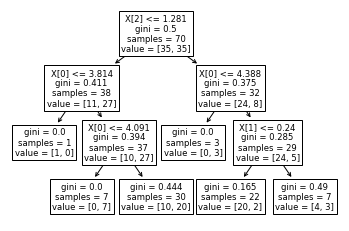

In [49]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X_features_training, Y_training)
tree.plot_tree(clf)

## Question 4 : Arbre de décision et précision
En observant l'arbre, on remarque que la primitive la plus importante est le rapport large/longueur, puis l'entropie, et la moins importante est la couleur.  

La variable max_depth indique la profondeur de l'arbre. La précision atteint un maximum pour une profondeur de deux et trois.(0.7). Un arbre pas assez profond n'est pas assez précis (under-fitting) et un arbre trop profond colle trop aux données originales (over-fitting).  
## Question 5 : Autres primitives
On peut constater que la couleur du pixel centrale n'est pas une primitive efficace. On pourrait choisir une autre primitive se basant sur la couleur comme par exemple l'index de concentration des couleurs.  

De plus, la forme semble être une très bonne primitive, nous pourrions rajouter des primitives qui donnent plus d'informations sur la forme des galaxies comme par exemple un histogramme des formes polaires.  

Enfin, une PCA permet de réduire l'image à un vecteur, ce qui peut être intéressant pour ajouter un grand nombre de primitives et voir leur influence.
## Conclusion
Pour conclure, nous avons utilisé le rapport largeur/longueur des galaxies, l'entropie de leurs images, ainsi que la couleur de leurs centres comme primitives. Nous avons ensuite utilisé un arbre de décision, pour prédire le type de galaxie. Nous avons obtenu la meilleure précision (0.7) pour un arbre de 2 étages.  

Il est possible d'améliorer nos résultats en remplaçant la primitive basée sur la couleur de la galaxie. De plus, il est possible d'utiliser d'autres primitives, peut-être plus efficaces, mais aussi plus difficile à extraire.Une difficulté rencontrée est le traitement des images. Il est en effet difficile de savoir quoi faire et quoi éviter.  

De plus, les procédés de traitement d'images ont énormément de paramètres et observer leur influence prend du temps.  La seconde difficulté est de trouver comment coder les features. Pour cela, différents outils nous ont été conseillers par nos professeurs comme opencv, scikit-learn. Ces librairies, bien que très complètes, demandent un temps d'adaptation avant de pouvoir être utilisées efficacement.